In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter= ',')

In [9]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
                        
X_train = X_train/255.0
X_test = X_test/255.0
                        
                        

In [10]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [11]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

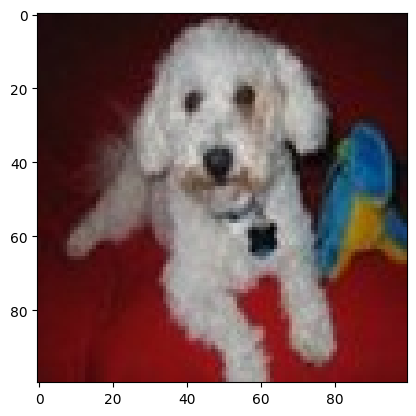

In [15]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [25]:
#MODEL
model = Sequential([
 Conv2D(32, (3,3), activation = 'relu', input_shape=(100,100,3)),
 MaxPooling2D((2,2)),
     
 Conv2D(32, (3,3), activation = 'relu'),
 MaxPooling2D((2,2)),
     
 Flatten(),
 Dense(64, activation = 'relu'),
 Dense(1, activation='sigmoid')
     
 ])

In [24]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 7s 218ms/step - loss: 0.0652 - accuracy: 0.9905
Epoch 2/5
32/32 [==============================] - 7s 219ms/step - loss: 0.0420 - accuracy: 0.9940
Epoch 3/5
32/32 [==============================] - 7s 221ms/step - loss: 0.0321 - accuracy: 0.9970
Epoch 4/5
32/32 [==============================] - 7s 219ms/step - loss: 0.0249 - accuracy: 0.9990
Epoch 5/5
32/32 [==============================] - 7s 219ms/step - loss: 0.0198 - accuracy: 0.9985


In [50]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 35ms/step - loss: 1.0619 - accuracy: 0.7125


[1.0618599653244019, 0.7124999761581421]

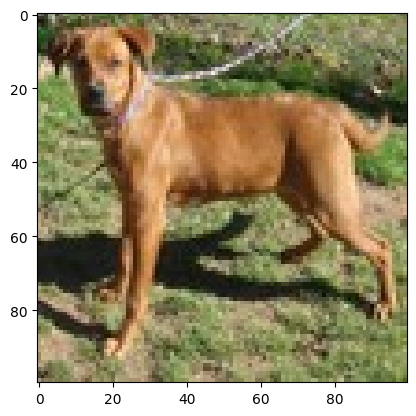

1/1 [==============================] - 0s 21ms/step
[[1.6785224e-06]]
model says it's a  dog


In [55]:
#Making Predictions
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print (y_pred)
y_pred = y_pred > 0.5
if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("model says it's a ", pred)